In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

mat_filename = "/Users/sherryyang/wigginsLab/data/0814/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00022xy0c1_track.mat"

loaded_data = loadmat(mat_filename)
vector = loaded_data['vector']
skeleton = loaded_data['skeleton']

In [ ]:
plt.figure(figsize=(25.63, 21.87))
image = plt.imshow(skeleton, cmap='Greys')

plt.xlim(0,2560)
plt.ylim(0,2160)
    
plt.gca().invert_yaxis()

for x in range(len(vector)):
    for y in range(len(vector[x])):
        vector_field_dot = vector[x][y]
        if(vector_field_dot[2] != 0):      
            plt.scatter(x, y, c='red', marker='o', s=10)
            vx,vy = vector_field_dot[0], vector_field_dot[1]
            plt.arrow(x, y, vx*5, vy*5, head_width = 5, width = 0.5, ec ='black')

In [33]:
plt.show()

In [13]:
skeleton

array([[ 0.02193671,  0.01989081,  0.01366535, ...,  0.01696005,
         0.02100521,  0.02202863],
       [ 0.0104627 ,  0.00921831,  0.00541976, ...,  0.00790101,
         0.00979802,  0.0098787 ],
       [-0.00269479, -0.00332588, -0.00573143, ..., -0.00573718,
        -0.00616413, -0.00644189],
       ...,
       [ 0.01180202,  0.00952503,  0.0099203 , ...,  0.00581524,
         0.00662207,  0.00623745],
       [ 0.00540233,  0.00055274, -0.00085443, ..., -0.00073445,
        -0.00122947,  0.00263476],
       [ 0.00117743, -0.00431037, -0.00468993, ..., -0.0014511 ,
        -0.00162339,  0.00570661]], dtype=float32)

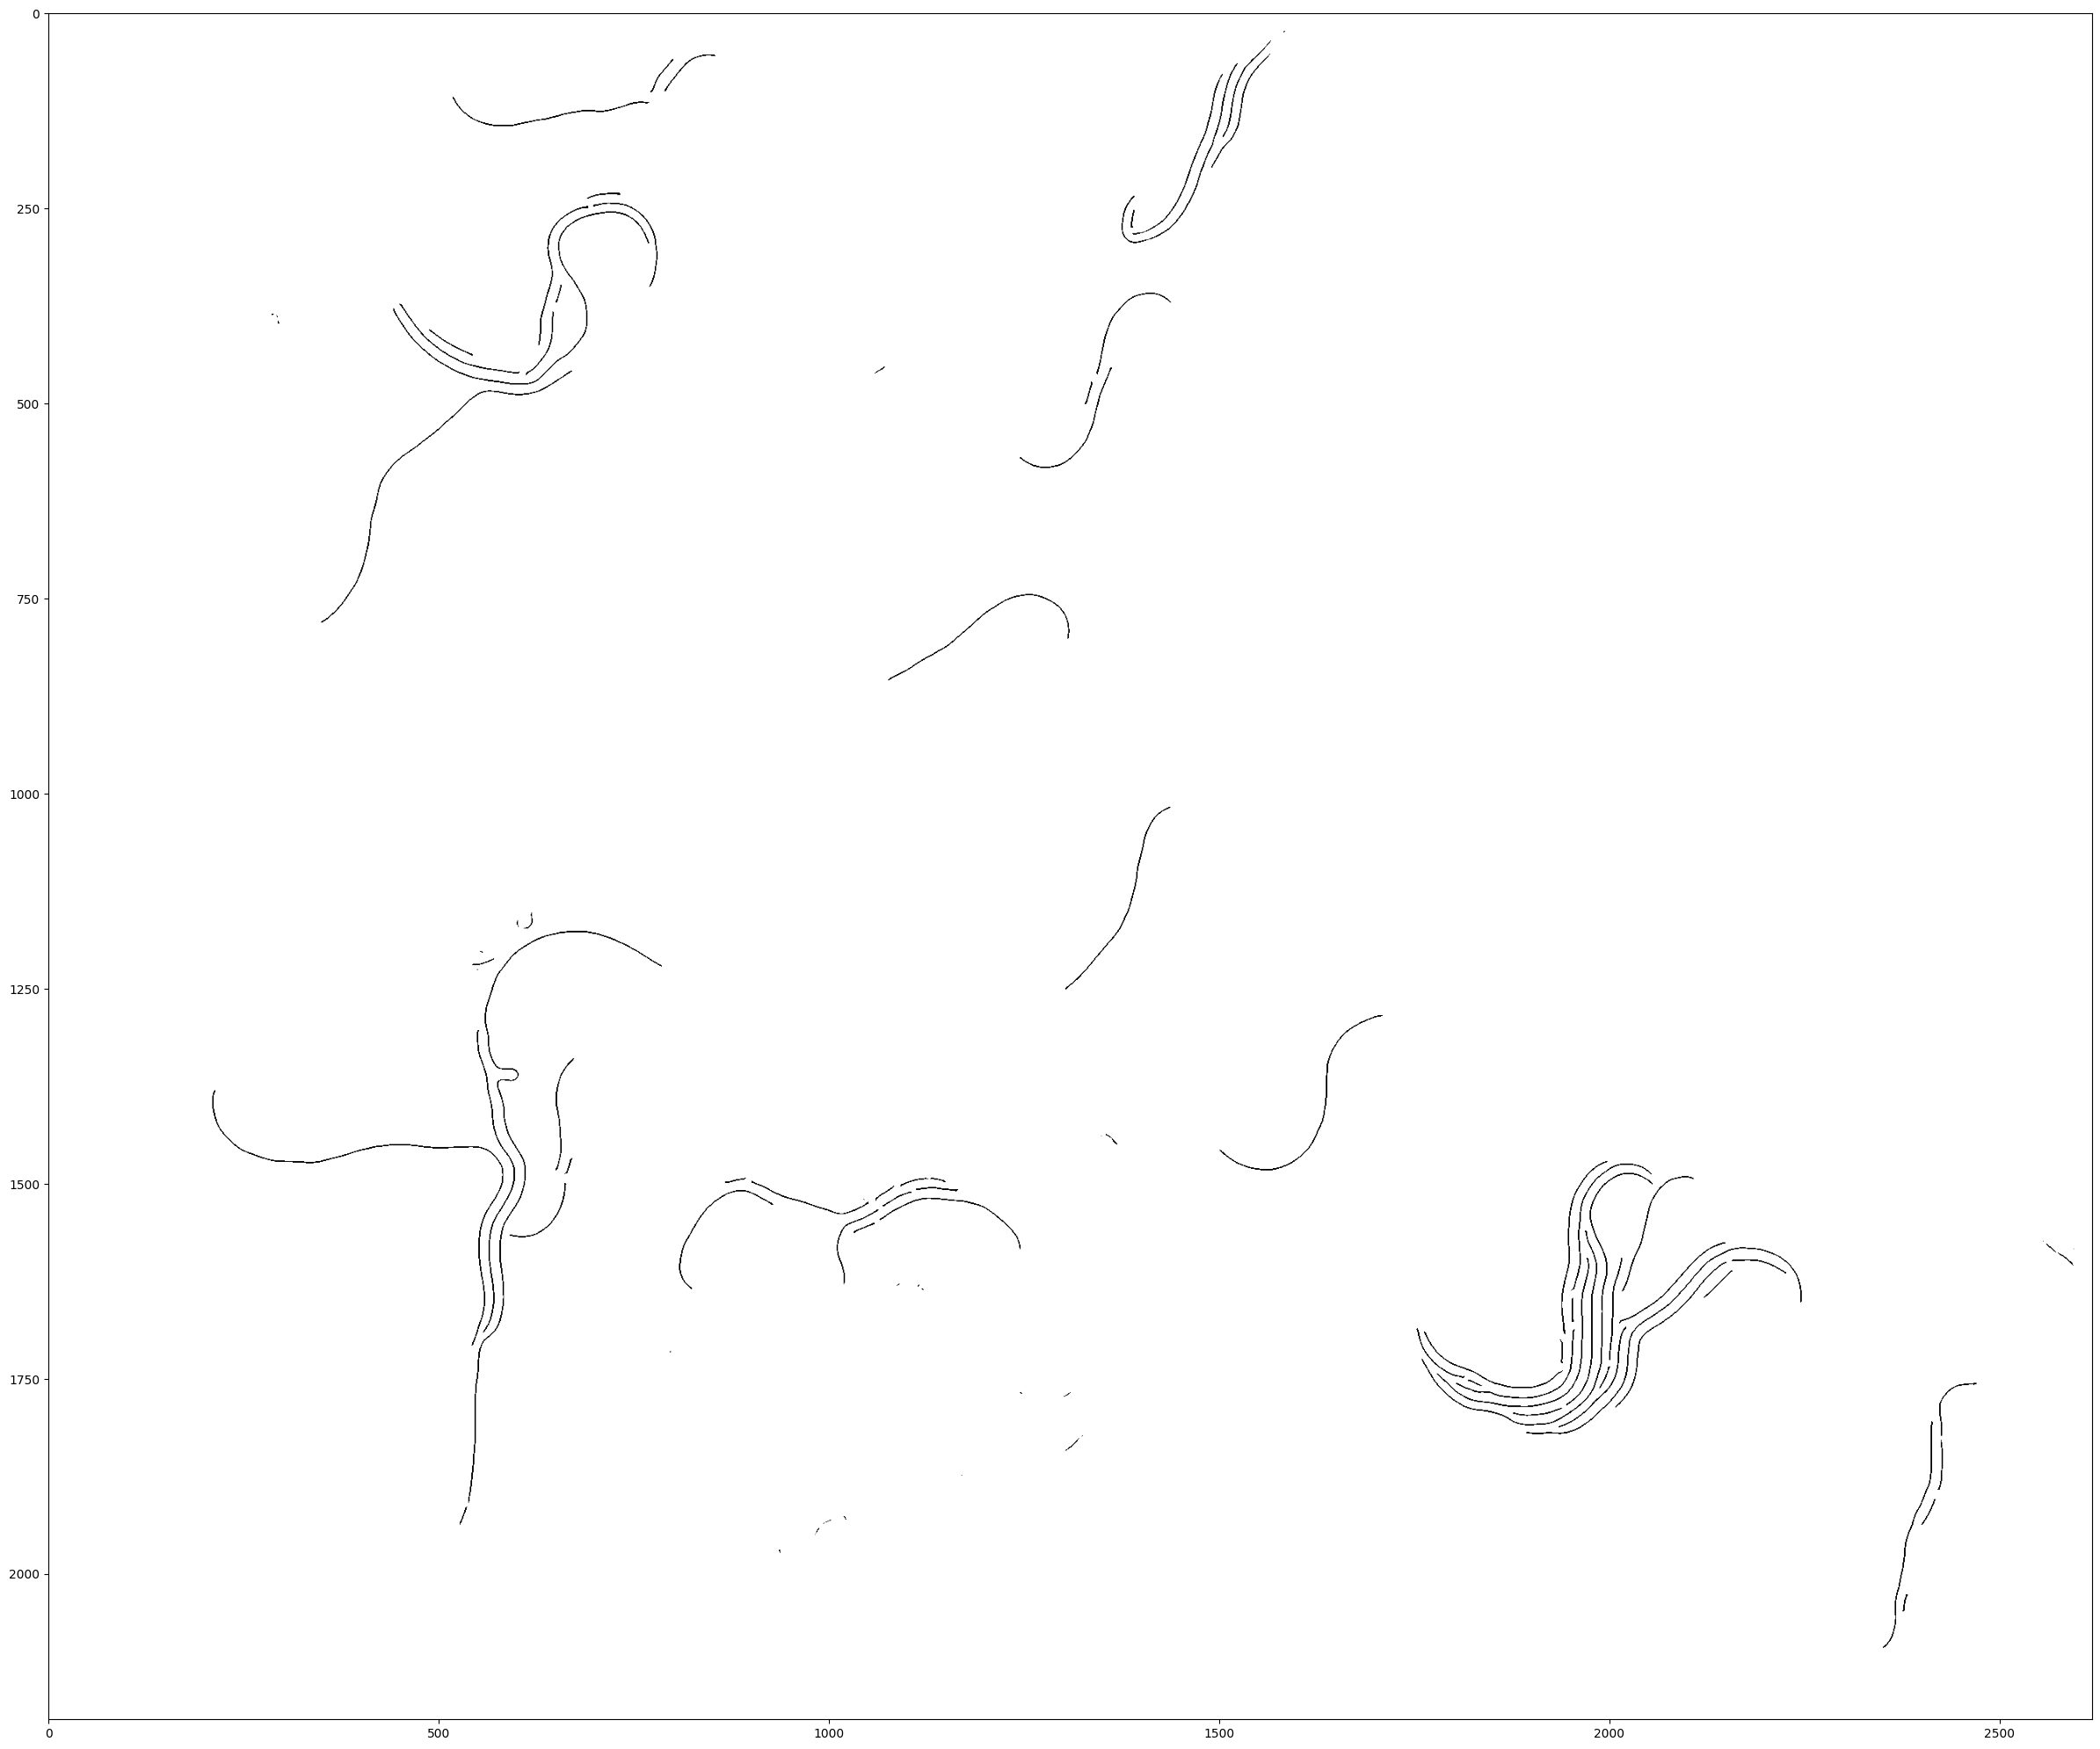

In [6]:
fig = plt.figure(figsize=(30, 30))
plt.gca().invert_yaxis()
image = plt.imshow((skeleton < -3), cmap='Greys')

In [2]:
from segger_tracker import SeggerTracker

In [7]:
def generate_imag(npy_path):
    dat = np.load(npy_path, allow_pickle=True).item()
    gradientsx = np.gradient(dat['flows'][-1][0])
    gradientsy = np.gradient(dat['flows'][-1][1])
    gradient_total = gradientsy[1] + gradientsx[0]
    regs_label = dat['masks']
    cell_num = np.max(regs_label)
    centers = SeggerTracker.find_skeleton_centers(cell_num, gradient_total, -3, regs_label)
    print(len(centers))
    all_ends = SeggerTracker.find_multi_ends(2, cell_num, centers, gradient_total,-3, regs_label)
    print(len(all_ends))
    print(all_ends)
    trans_array = np.zeros([len(regs_label[0]),len(regs_label),3])
    plt.figure(figsize=(25.63, 21.87))
    image = plt.imshow(gradient_total, cmap='Greys')

    plt.xlim(0,2560)
    plt.ylim(0,2160)

    plt.gca().invert_yaxis()

    for each in all_ends:
        [x,y] = SeggerTracker.extract_xy(each)
        plt.scatter(x, y, c='red', marker='o', s=10)
        [vx,vy] = SeggerTracker.calculate_local_slop(each, 10,gradient_total,regs_label, -3)
        plt.arrow(x, y, vx*5, vy*5, head_width = 5, width = 0.5, ec ='black')


    image_filename = npy_path.replace('_seg.npy', '.png')
    image_filename = image_filename.replace('xy0/phase', 'images')
    plt.show()

In [6]:
npy_file = "/Users/sherryyang/wigginsLab/data/0814/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00022xy0c1_seg.npy"
generate_imag(npy_file)

68
0
1
0
[]


68
134
[5301565, 5500854, 10200772, 23501391, 28301389, 10800518, 23800690, 24800698, 24800691, 25301390, 37900442, 34900656, 46301344, 46000603, 38300646, 43800543, 57101245, 78100349, 47301336, 80201306, 101801437, 122200785, 145701501, 130400551, 148300650, 170700543, 148800661, 169301943, 148802054, 172501760, 149402108, 149800867, 150301092, 156700591, 152601050, 150301083, 150801112, 152700928, 151201105, 154601065, 153401063, 155101058, 156101969, 157602148, 160502594, 182001894, 159602016, 159902157, 174401779, 178702008, 161202157, 164701953, 168402021, 168701955, 174801814, 174001940, 170001937, 176201988, 175901836, 175702470, 179501877, 209402351, 182902425, 190502418, 204802377, 15901505, 175701804, 19801491, 10000791, 6000800, 6501523, 7901504, 11500769, 23200732, 35100770, 42600628, 27501389, 29500769, 37100650, 37101438, 37300450, 46300612, 40600488, 45501362, 46000670, 50101329, 85501076, 125001303, 190900538, 128501709, 169100557, 134000673, 138100213, 146800671, 1472

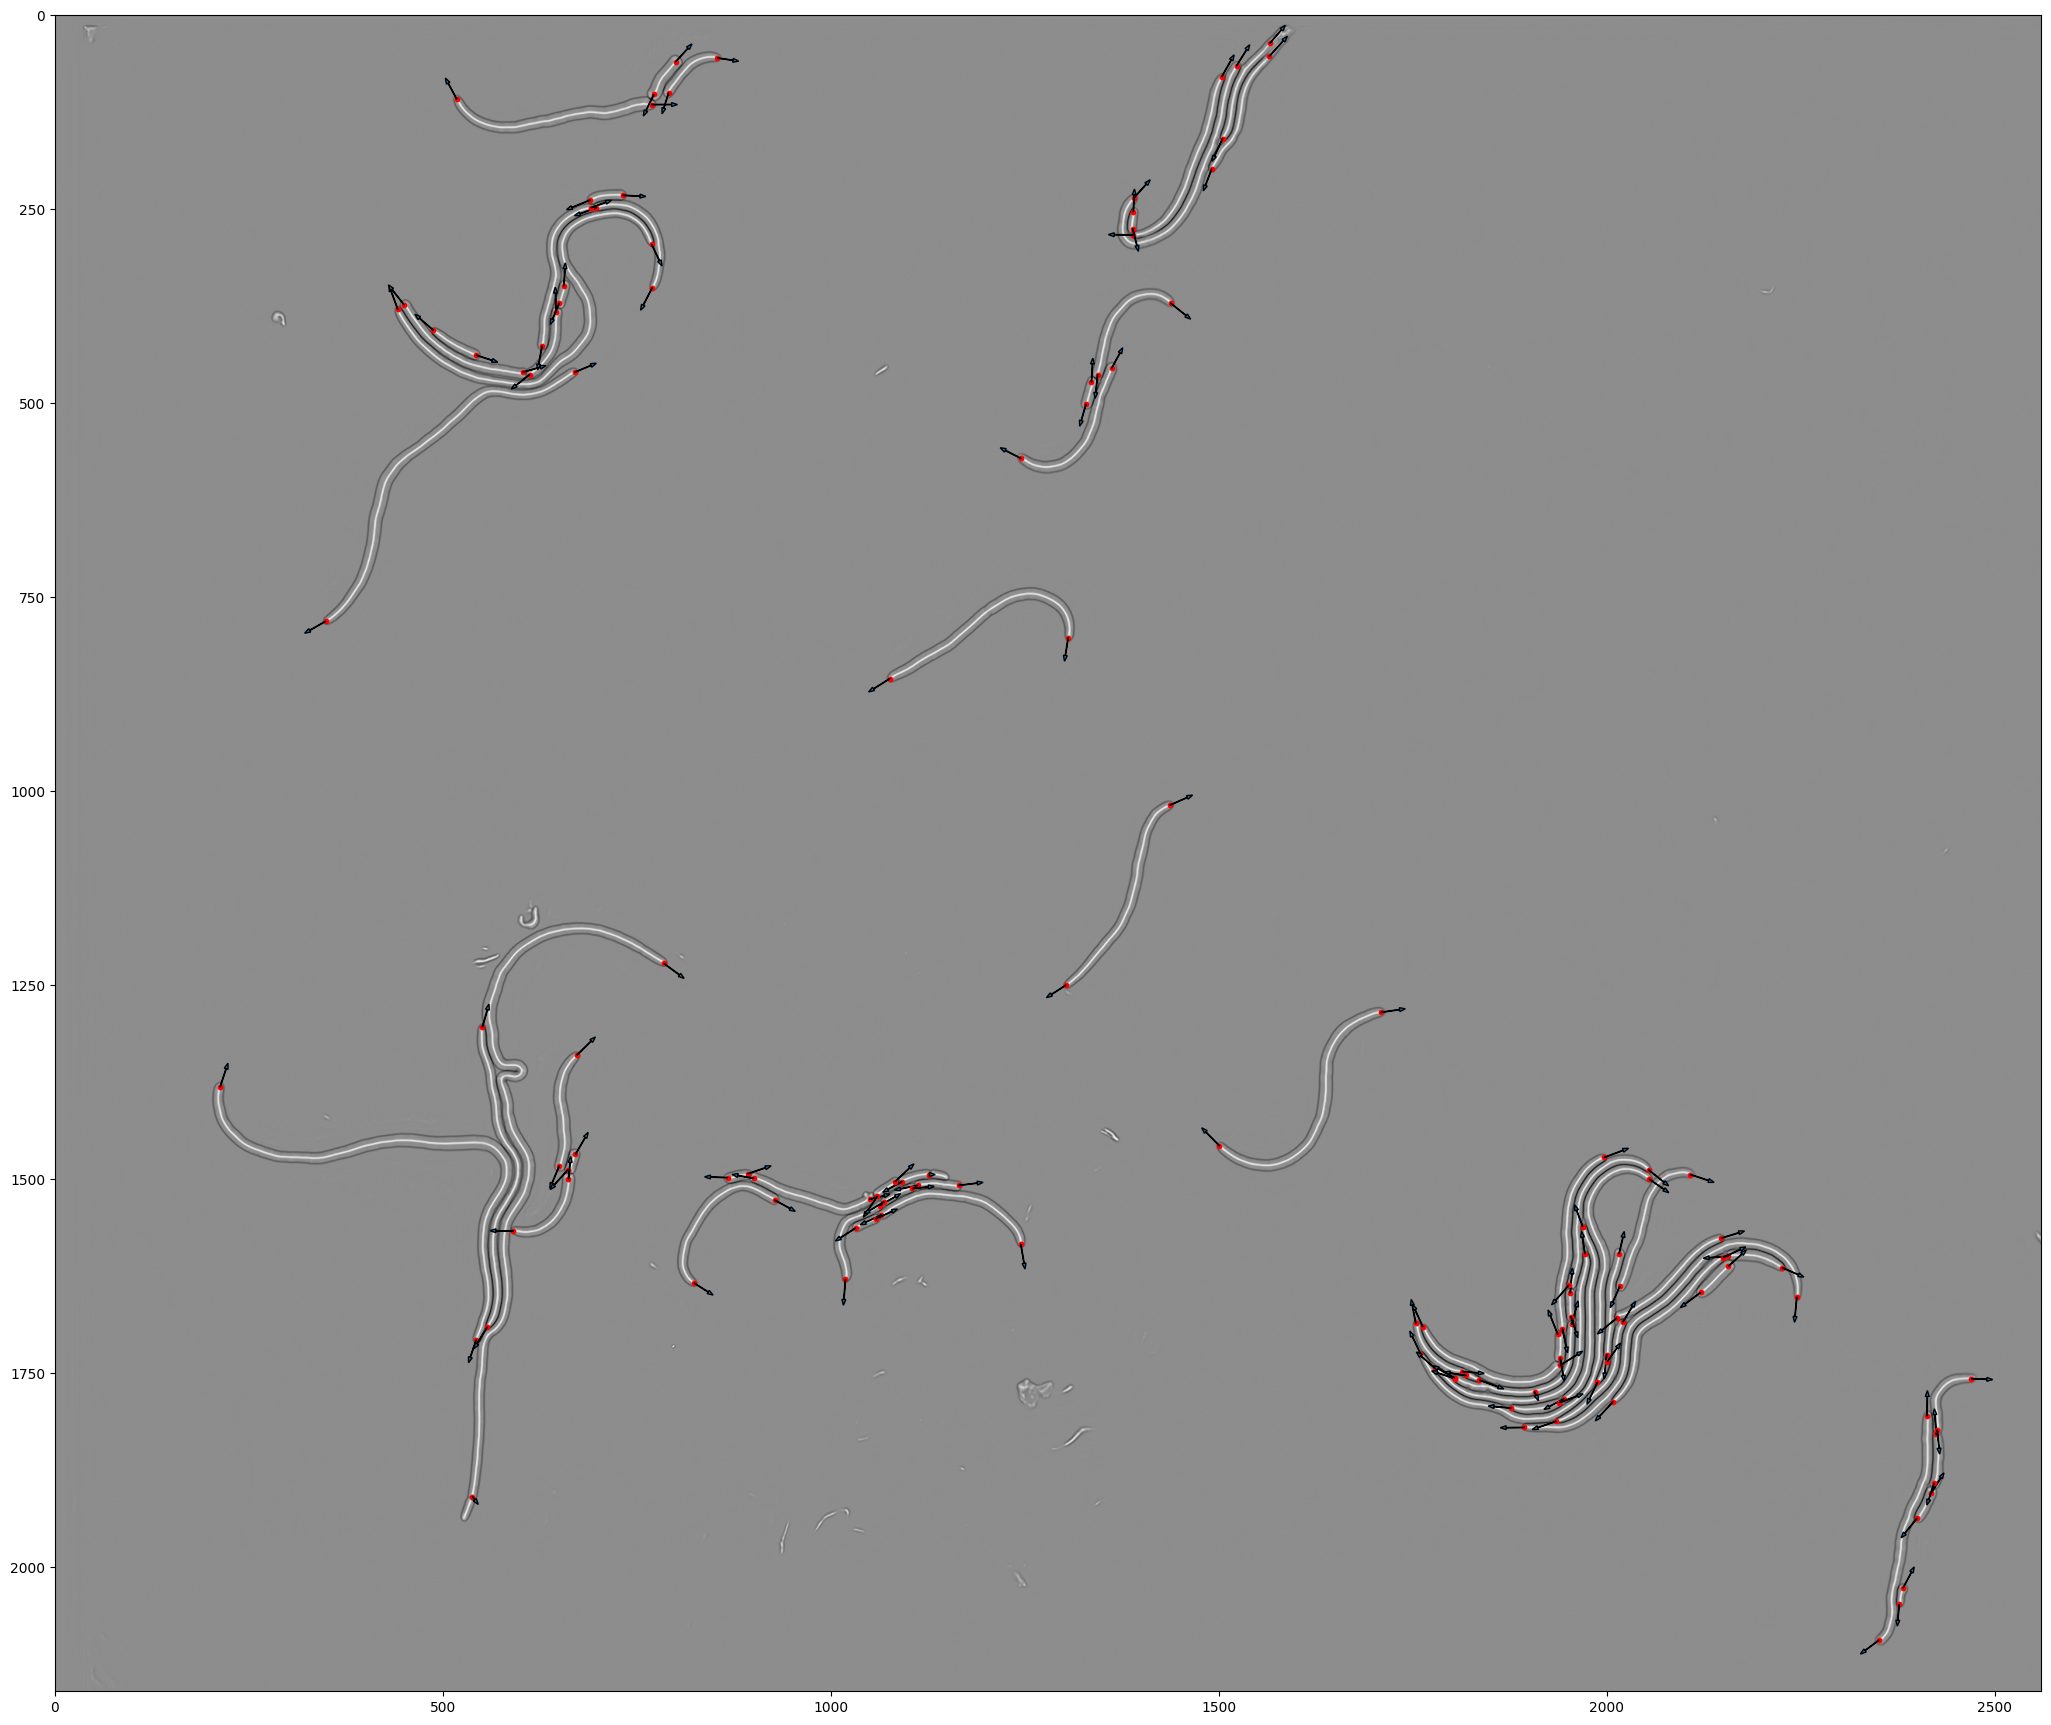

In [12]:
npy_path = "/Users/sherryyang/wigginsLab/data/0814/xy0/phase/211121_37C_10_1176_HU_timelapse002_prob211203_HU_t00022xy0c1_seg.npy"


plt.show()

In [10]:
centers

[152001044,
 12601527,
 6800815,
 8100783,
 21201473,
 19001466,
 13400642,
 23300712,
 27500771,
 32900645,
 26501389,
 34700674,
 36000654,
 38801366,
 44000516,
 42700641,
 42500515,
 54201331,
 56300462,
 48801333,
 77801191,
 113501387,
 148700610,
 140701634,
 150600593,
 141000653,
 145200435,
 147800667,
 157801948,
 153501964,
 168001990,
 155302047,
 149600880,
 149501120,
 154900644,
 152600975,
 151201071,
 150701139,
 154600834,
 151901086,
 152301164,
 157201013,
 155701045,
 167501977,
 163002081,
 159102578,
 166702061,
 166102005,
 160002192,
 173201962,
 168302061,
 162902139,
 166301953,
 176002000,
 176501928,
 172701774,
 175001842,
 171601939,
 174801995,
 175501827,
 177802426,
 179601908,
 194902384,
 186102426,
 192102410,
 203702379,
 9601522,
 176501825]

In [5]:
from segger_tracker import SeggerTracker
len(SeggerTracker.flow_to_ends(centers, gradient_total, -1))

894

In [9]:
from segger_tracker import SeggerTracker
SeggerTracker.flow_to_ends(centers, gradient_total, -1)

[175601826,
 158902576,
 166201953,
 36000653,
 36000655,
 147700666,
 147700668,
 151101071,
 165902004,
 48701332,
 48701334,
 166402062,
 171601941,
 154400833,
 168101992,
 203702377,
 148500612,
 179701908,
 179701909,
 179701910,
 42600643,
 154101962,
 177502426,
 13500645,
 26501387,
 152101160,
 152101161,
 152101162,
 55900465,
 192002412,
 194902382,
 171501941,
 168001992,
 203602377,
 162802142,
 155501046,
 154001962,
 44200516,
 26401387,
 151401070,
 8401525,
 140501636,
 176601824,
 158001947,
 173701963,
 159802189,
 159802190,
 159802191,
 33100644,
 154700648,
 153901962,
 27300772,
 21101475,
 39101362,
 11801528,
 149500879,
 149500880,
 140401636,
 19301467,
 157901947,
 167801979,
 173601963,
 176501932,
 175301825,
 33000644,
 113501389,
 150500595,
 159202576,
 11701528,
 186502427,
 23100710,
 23100711,
 23100712,
 175902003,
 148700612,
 167701979,
 157801947,
 155502045,
 173501963,
 32900644,
 113401389,
 141700653,
 11601528,
 186402427,
 145100430,
 1451

In [126]:
def flow_to_ends(start_points, gradient_total, threshold):
    # Don't pollute original data
    start_points_copy = start_points.copy()
    gradient_total_copy = gradient_total.copy()
    masked_array = gradient_total_copy < threshold
    # Point set is the set flow go through 
    point_set = set(start_points_copy)
    end_point = []
    while point_set:
        new_set = set()
        for element in point_set:
            [xx,yy] = SeggerTracker.extract_xy(element)
            # DO waterfront
            waterfront_set = set([
                element - 1,
                element + 1,
                element - SeggerTracker.DIGIT_CONST + 1,
                element + SeggerTracker.DIGIT_CONST + 1,
                element + SeggerTracker.DIGIT_CONST - 1, 
                element - SeggerTracker.DIGIT_CONST - 1,
                element + SeggerTracker.DIGIT_CONST,
                element - SeggerTracker.DIGIT_CONST,
            ])
                
            flag = False
            for each in waterfront_set:
                [x,y] = SeggerTracker.extract_xy(each)
                if (x < 0) or (y < 0) or (y >= len(masked_array)) or (x >= len(masked_array[0])):
                    continue
                else:
                    if masked_array[y,x]:
                        new_set.add(each)
                        flag = True
            if flag is False:
                end_point.append(element)
            masked_array[yy,xx] = False

        # Mask the pixels out when the whole waterfront of pixels iterated, so won't self eated. 
        for each in new_set:
            [x,y] = SeggerTracker.extract_xy(each)
            masked_array[y,x] = False
            
        point_set = new_set

    return end_point

In [104]:
def flow_to_ends(start_points, gradient_total, threshold):
    # Don't pollute original data
    start_points_copy = start_points.copy()
    gradient_total_copy = gradient_total.copy()
    masked_array = gradient_total_copy < threshold
    # Point set is the set flow go through
    point_set = set(start_points_copy)
    end_point = []
    while point_set:
        newSet = set()
        for element in point_set:
            [xx,yy] = SeggerTracker.extract_xy(element)
            # DO waterfront
            waterfront_set = set([
                element - 1,
                element + 1,
                element - SeggerTracker.DIGIT_CONST + 1,
                element + SeggerTracker.DIGIT_CONST + 1,
                element + SeggerTracker.DIGIT_CONST - 1, 
                element - SeggerTracker.DIGIT_CONST - 1,
                element + SeggerTracker.DIGIT_CONST,
                element - SeggerTracker.DIGIT_CONST,
            ])
            flag = False
            for each in waterfront_set:
                [x,y] = SeggerTracker.extract_xy(each)
                if ((x < 0) or (y < 0) or (y >= len(masked_array)) or (x >= len(masked_array[0]))):
                    continue
                else:
                    if masked_array[y,x] is True :
                        newSet.add(each)
                        flag = True
            if flag is False:
                end_point.append(element)
            masked_array[yy,xx] = False

        # Mask the pixels out when the whole waterfront of pixels iterated, so won't self eated.
        for each in newSet:
            [x,y] = SeggerTracker.extract_xy(each)
            masked_array[y,x] = False

        point_set = newSet

    return end_point

In [127]:
len(flow_to_ends(centers, gradient_total, -1))

894

In [89]:
len(centers)

68